In [ ]:
import numpy as np

!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',', dtype=None)
print(data.shape)

--2023-03-01 17:49:30--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt.2’

f150_motor_distribu 100%[===================>] 249.55K   342KB/s    in 0.7s    

2023-03-01 17:49:32 (342 KB/s) - ‘f150_motor_distributors.txt.2’ saved [255541/255541]

(5000, 2)


### Question 1

In [ ]:
init_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
    
# Implement kmeans
def k_means(data, centers):
  centroids = centers
  clusters = np.zeros(len(data))
  for i in range(100):
    for j, point in enumerate(data):
      distances = [distance(point, c) for c in centroids]
      clusters[j] = np.argmin(distances)
    # Update the centroid positions
    for k in range(5):
      centroids[k] = np.mean(data[clusters == k], axis=0)
  return clusters, centroids

clusters, centroids = k_means(data, init_centroids)

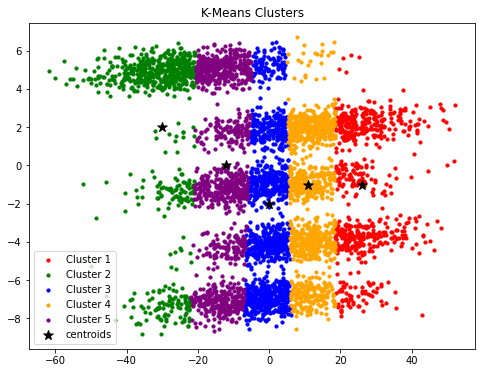

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i in range(5):
  plt.scatter(data[clusters == i, 0], data[clusters == i, 1], s=10, color=colors[i], label='Cluster {}'.format(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*', s=100, label='centroids')

plt.legend()
plt.title('K-Means Clusters')
plt.show()

The choice of k=5 for this dataset is a logical choice because the data are for five years. 

But after plotting the resulting clusters, it seems the initialization did not cluster the data very well. The clusters appear to be overlapping and not clearly separated, some points in the same cluster are far away from each other, and some points may have been misclassified, So the initialization centroids may not be optimal for this dataset. It is possible that a different number of clusters may result in better clustering performance.

### Question 2

In [ ]:
centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
P = np.array([[10, 0.5], [-10, 0.25]])
P_inv = np.linalg.inv(P)

def mahalanobis_distance(x, y):
  return (x - y).T @ P_inv @ (x - y)

# run k-means with Mahalanobis Distance
def k_means_mahalanobis(data):
  n = len(data)
  clusters = np.zeros(n)
  distances = np.zeros((n, 5))

  for i in range(100):
    for j in range(5):
      distances[:,j] = np.apply_along_axis(lambda x: mahalanobis_distance(x, centroids[j]), 1, data)
    clusters = np.argmin(distances, axis=1)
    for j in range(5):
      centroids[j,:] = np.mean(data[clusters == j,:], axis=0)

  return clusters, centroids

clusters, centroids = k_means_mahalanobis(data)

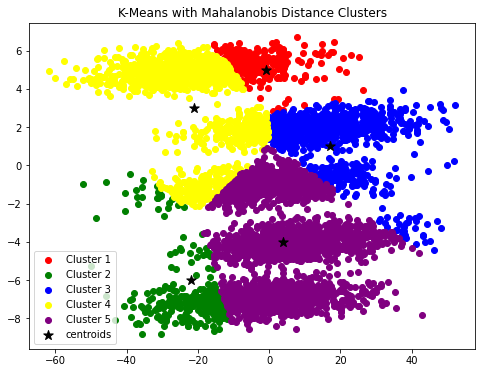

In [ ]:
# scatter plot with different colors for different clusters
colors = ['red', 'green', 'blue', 'yellow', 'purple']
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
  plt.scatter(data[clusters == i,0], data[clusters == i,1], c=colors[i], label='Cluster {}'.format(i+1))
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, color='black',label='centroids')
plt.legend()
plt.title('K-Means with Mahalanobis Distance Clusters')
plt.show()


In [ ]:
# Perform PCA on aggregate data
mean_data = data - np.mean(data, axis=0)
U, S, V = np.linalg.svd(mean_data)
principle_components = V.T
print('Principal Components of Aggregated data')
print(principle_components)
# Perform PCA on each cluster

for i in range(5):
  cluster_data = data[clusters == i]
  mean_cluster_data = cluster_data - np.mean(cluster_data, axis=0) 
  U_cluster, S_cluster, V_cluster = np.linalg.svd(mean_cluster_data)
  principle_components_c = V_cluster.T
  print(f'Principal Components of Cluster {i}:')
  print(principle_components_c)


Principal Components of Aggregated data
[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]
Principal Components of Cluster 0:
[[-0.99992596 -0.01216833]
 [ 0.01216833 -0.99992596]]
Principal Components of Cluster 1:
[[-0.99634073  0.08547019]
 [ 0.08547019  0.99634073]]
Principal Components of Cluster 2:
[[-0.99919452 -0.04012877]
 [ 0.04012877 -0.99919452]]
Principal Components of Cluster 3:
[[-0.99621487  0.08692491]
 [ 0.08692491  0.99621487]]
Principal Components of Cluster 4:
[[ 0.99998544 -0.00539582]
 [-0.00539582 -0.99998544]]


In [ ]:
P = np.array([[10, 0.5], [-10, 0.25]])
PT = np.transpose(P)
eigenvalues, eigenvectors = np.linalg.eig(PT)
Lambda = np.diag(eigenvalues)
Phi = eigenvectors

P_prime = np.dot(Lambda, Phi)

print("P_Prime\n",P_prime)

P_Prime
 [[9.44301625 6.95724558]
 [0.04300577 0.53717161]]


The relationship between P' and the data is P' can be viewed as the initial data dimensions rotated into a new coordinate system determined by the main axis of the data.

### Question 3

Question 3a

**F3:** {1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 3, 4}, {2, 3, 4}, {2, 3, 5}, {3, 4, 5}.

**F1:** {1}, {2}, {3}, {4}, {5}


**F1 * F3:**

{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}.

Question 3b


*   {1, 2, 3} * {1, 2, 4} = {1, 2, 3, 4}  
*   {1, 2, 3} * {1, 2, 5} = {1, 2, 3, 5}
*   {1, 2, 4} * {1, 2, 5} = {1, 2, 4, 5} 
*   {2, 3, 4} * {2, 3, 5} = {2, 3, 4, 5} 
 

{1, 2, 3, 4},{1, 2, 3, 5}, {1, 2, 4, 5}, {2, 3, 4, 5}.


Question 3c:

{1, 2, 3, 4}: All subsets {1, 2, 3}, {1, 2, 4}, {1, 3, 4}, {2, 3, 4} are frequent. So it survives.



### Question 4

Question 4a:

There are 7 items: Beer, Diapers, Milk, Bread, Butter, Cookies, Eggs:

\begin{equation}
R = 3^{n} - 2^{n+1} + 1 => R = 3^{7} - 2^{7+1} + 1 = 1932 
\end{equation} 


Question 4b:
\begin{equation}
Confidence(Milk,Diapers => Butter) = 
\frac{2}{4} = 0.5
\end{equation} 

Question 4c:
\begin{equation}
Support(Milk,Diapers => Butter) = 
\frac{2}{10} = 0.2
\end{equation} 

Question 4d:

True. If {a, b, c, d} is a frequent itemset then {a, b} must also be a frequent itemset.

Question 4e:

True. Since {a,b,c} contains all the items in each of these frequent itemsets, its support count must be at least greater than or equal to the minimum support threshold.

Question 4f:

False. Because we don't know if the itemset contains other candidates that also contains b. So the support of b cannot be defined.

Question 4g:

False. The max number of size-2 frequent itemsets is  the combination of 5 items which shoule be 10.

Question 4h:

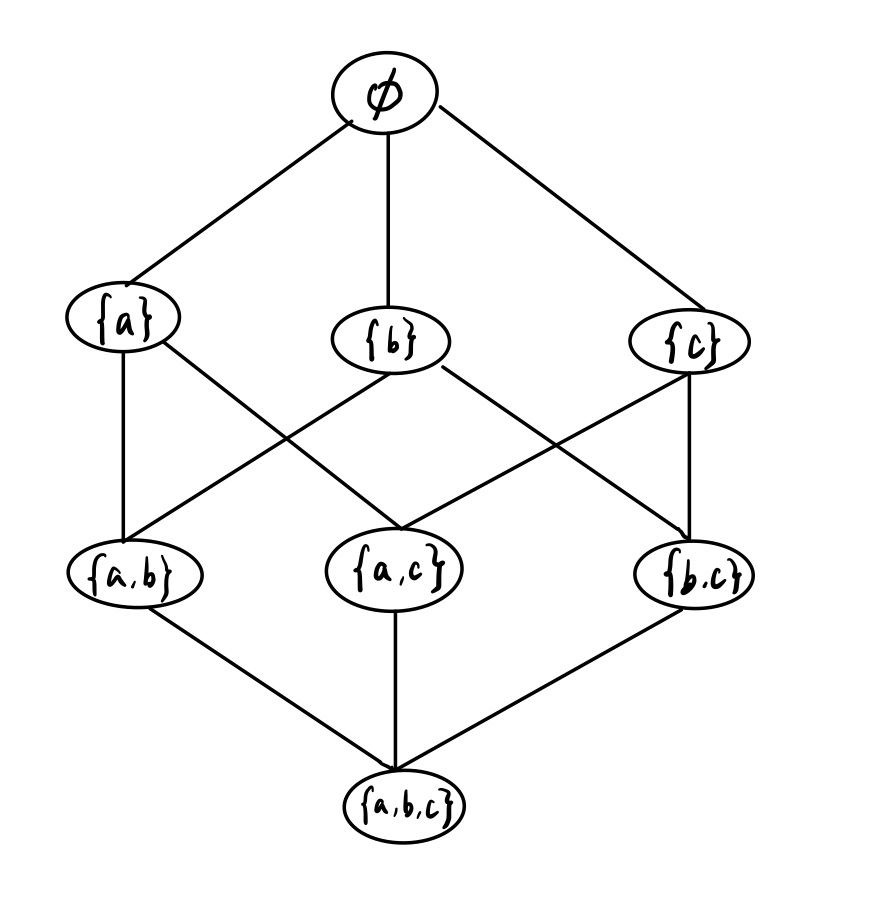